In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
data = load_breast_cancer()

In [3]:
dataframe = pd.DataFrame(data.data,columns=data.feature_names)
dataframe['target'] = data.target
dataframe['target'] = dataframe['target'].apply(lambda x:data.target_names[x])

In [4]:
X = dataframe.drop(columns='target')

In [5]:
y = dataframe['target'].map({'benign':0,'malignant':1})

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [10]:
deep_model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_std.shape[1]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
deep_model.save_weights(filepath="./init_weights.h5")

In [11]:
history = {}

SGD

In [12]:
deep_model.load_weights("./init_weights.h5")
deep_model.compile(keras.optimizers.SGD(lr=0.001), loss = keras.losses.binary_crossentropy, metrics=["accuracy"])
history['sgd'] = deep_model.fit(X_train_std, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 0s 761us/step - loss: 0.6849 - accuracy: 0.5913
Epoch 2/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6763 - accuracy: 0.6280
Epoch 3/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.6271
Epoch 4/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.6270
Epoch 5/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6675 - accuracy: 0.6620
Epoch 6/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6705
Epoch 7/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6877
Epoch 8/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6588 - accuracy: 0.7038
Epoch 9/250
14/14 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.7529
Epoch 10/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.7705
Epoch 1

In [13]:
deep_model.evaluate(X_test_std, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9790


[0.11431761831045151, 0.9790209531784058]

In [15]:
y_preds_deep = deep_model.predict_classes(X_test_std)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test, y_preds_deep))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



momentum

In [18]:
deep_model.load_weights("./init_weights.h5")
deep_model.compile(keras.optimizers.SGD(lr=0.001, momentum=0.9), loss = keras.losses.binary_crossentropy, metrics=["accuracy"])
history['momentum'] = deep_model.fit(X_train_std, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.5961
Epoch 2/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6544 - accuracy: 0.7264
Epoch 3/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6112 - accuracy: 0.8445
Epoch 4/250
14/14 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.8825
Epoch 5/250
14/14 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.8738
Epoch 6/250
14/14 [==============================] - 0s 2ms/step - loss: 0.4985 - accuracy: 0.8957
Epoch 7/250
14/14 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.9173
Epoch 8/250
14/14 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.8924
Epoch 9/250
14/14 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.9133
Epoch 10/250
14/14 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.9185
Epoch 11/

In [19]:
deep_model.evaluate(X_test_std, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9790


[0.06508400291204453, 0.9790209531784058]

In [20]:
y_preds_deep = deep_model.predict_classes(X_test_std)

In [21]:
print(classification_report(y_test, y_preds_deep))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



NAG

In [22]:
deep_model.load_weights("./init_weights.h5")
deep_model.compile(keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True), loss = keras.losses.binary_crossentropy, metrics=["accuracy"])
history['Nestrov'] = deep_model.fit(X_train_std, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 0s 770us/step - loss: 0.6810 - accuracy: 0.6290
Epoch 2/250
14/14 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.7218
Epoch 3/250
14/14 [==============================] - 0s 742us/step - loss: 0.6190 - accuracy: 0.8210
Epoch 4/250
14/14 [==============================] - 0s 818us/step - loss: 0.5777 - accuracy: 0.8539
Epoch 5/250
14/14 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.8913
Epoch 6/250
14/14 [==============================] - 0s 874us/step - loss: 0.4952 - accuracy: 0.8847
Epoch 7/250
14/14 [==============================] - 0s 810us/step - loss: 0.4513 - accuracy: 0.9094
Epoch 8/250
14/14 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.9041
Epoch 9/250
14/14 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.9186
Epoch 10/250
14/14 [==============================] - 0s 1ms/step - loss: 0.3226 - accuracy: 0.9430

In [23]:
deep_model.evaluate(X_test_std, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9790


[0.06563853472471237, 0.9790209531784058]

In [24]:
y_preds_deep = deep_model.predict_classes(X_test_std)

In [25]:
print(classification_report(y_test, y_preds_deep))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [26]:
deep_model.load_weights("./init_weights.h5")
deep_model.compile(keras.optimizers.RMSprop(momentum=0.9, rho=0.9, lr=0.001), loss = keras.losses.binary_crossentropy, metrics=["accuracy"])
history['rmsprop'] = deep_model.fit(X_train_std, y_train, epochs=250)

Epoch 1/250
14/14 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8469
Epoch 2/250
14/14 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.9194
Epoch 3/250
14/14 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9695
Epoch 4/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9875
Epoch 5/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9894
Epoch 6/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.9934
Epoch 7/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9887
Epoch 8/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9900
Epoch 9/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9929
Epoch 10/250
14/14 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9941
Epoch 11/

In [27]:
deep_model.evaluate(X_test_std, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.9019 - accuracy: 0.9650


[0.9019240736961365, 0.9650349617004395]

In [28]:
y_preds_deep = deep_model.predict_classes(X_test_std)

In [29]:
print(classification_report(y_test, y_preds_deep))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.93      0.98      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



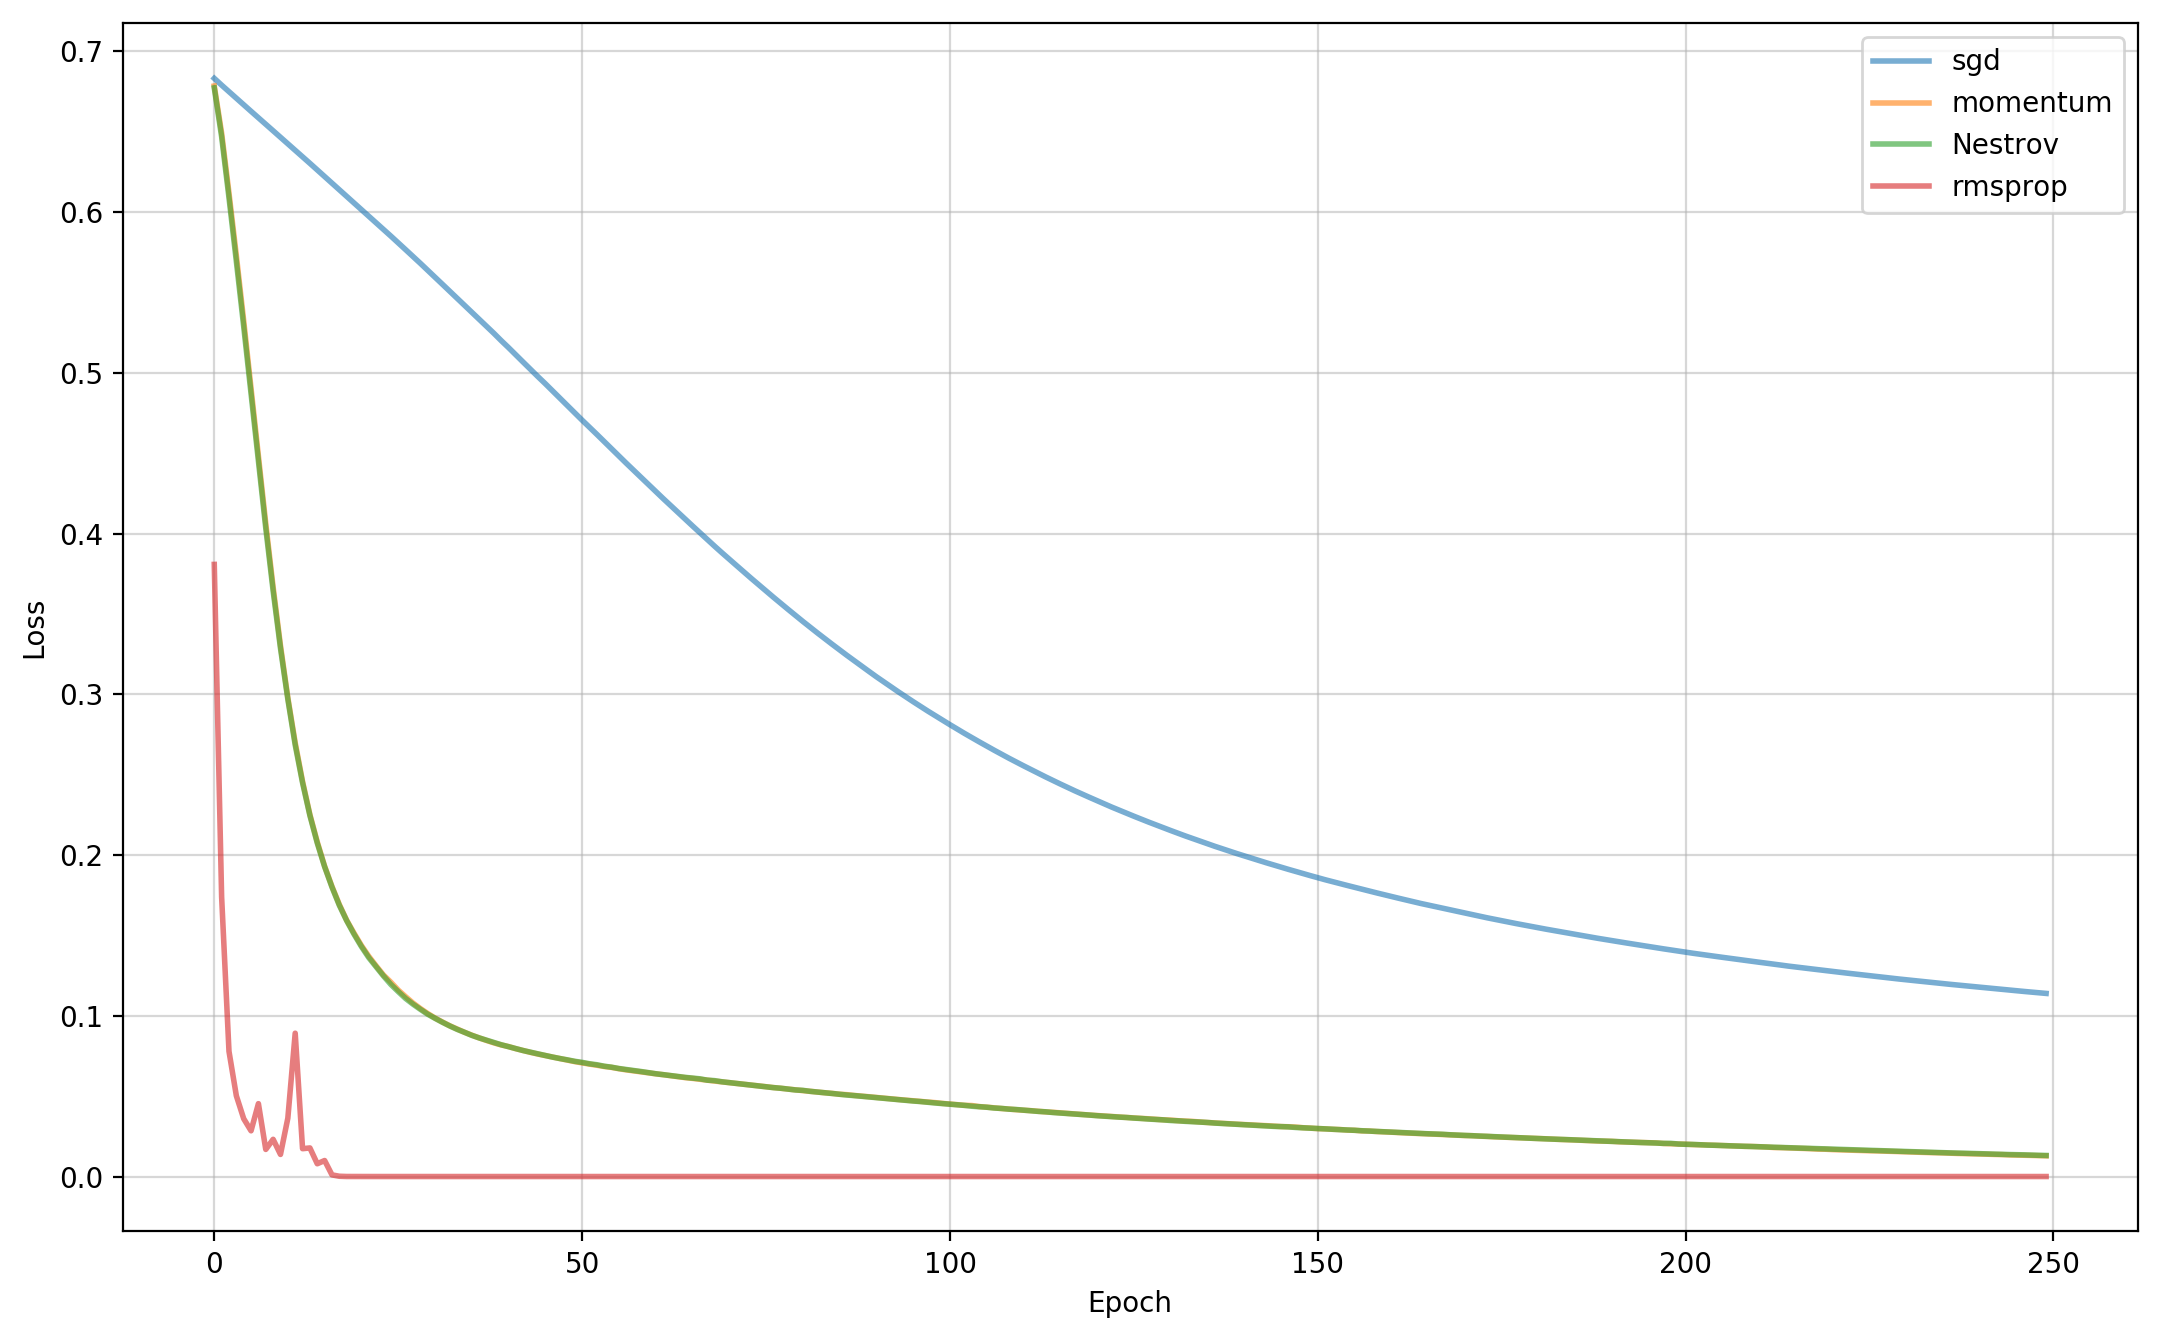

In [30]:
plt.figure(figsize=(13,8), dpi=200)
for key in history.keys():
    plt.plot(history[key].history["loss"], lw=2, label=key, alpha=0.6)
plt.legend()
plt.grid(True, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('./loss.png', dpi=200)